# Example 3: Deep Formulas

The orignal Kolmogorov-Arnold theorem says that it suffices to have 2-Layer function composition (inner and outer functions), but the functions might be non-smooth or even fractal. We generalize KA representation to arbitrary depths. An example a 2-Layer KAN (with smooth activations) is unable to do is: $f(x_1,x_2,x_3,x_4)={\rm exp}({\rm sin}(x_1^2+x_2^2)+{\rm sin}(x_3^2+x_4^2))$, which requires at least 3-Layer KANs.

### Three-layer KAN

In [24]:
from kan import *

# create a KAN: 2D inputs, 1D output, and 5 hidden neurons. cubic spline (k=3), 5 grid intervals (grid=5).
model = KAN(width=[4,2,1,1], grid=3, k=3, seed=1)
f = lambda x: torch.exp((torch.sin(torch.pi*(x[:,[0]]**2+x[:,[1]]**2))+torch.sin(torch.pi*(x[:,[2]]**2+x[:,[3]]**2)))/2)
dataset = create_dataset(f, n_var=4, train_num=3000)

# train the model
model.fit(dataset, opt="LBFGS", steps=20, lamb=0.002, lamb_entropy=2.);

train loss: 2.35e-02 | test loss: 2.48e-02 | reg: 5.75e+00 : 100%|██| 20/20 [00:05<00:00,  3.99it/s]


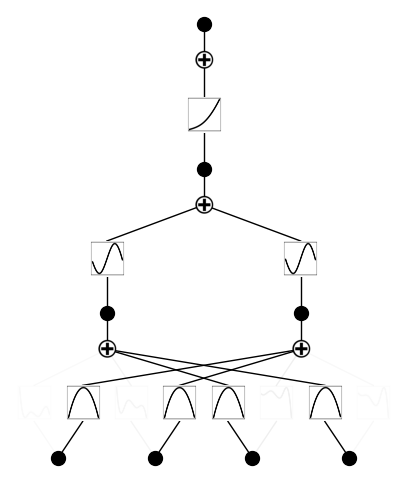

In [25]:
model.plot(beta=10)

In [26]:
model = model.prune(edge_th=5e-2)

FileNotFoundError: [Errno 2] No such file or directory: './model/history.txt'

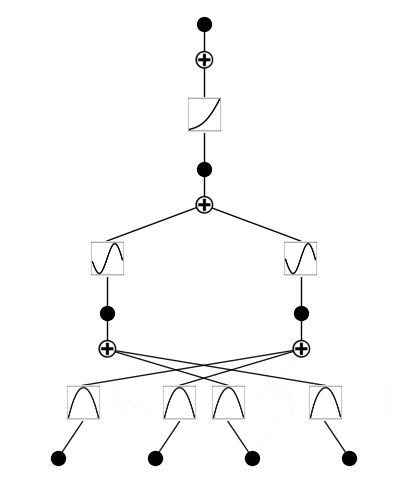

In [27]:
model.plot()

In [28]:
grids = [3,5,10,20,50]
#grids = [5]

train_rmse = []
test_rmse = []

for i in range(len(grids)):
    model = KAN(width=[4,2,1,1], grid=grids[i], k=3, seed=0).initialize_from_another_model(model, dataset['train_input'])
    results = model.fit(dataset, opt="LBFGS", steps=50, stop_grid_update_step=30);
    train_rmse.append(results['train_loss'][-1].item())
    test_rmse.append(results['test_loss'][-1].item())

train loss: 5.11e-03 | test loss: 5.29e-03 | reg: 4.98e+00 : 100%|██| 50/50 [00:11<00:00,  4.34it/s]
train loss: 2.11e-03 | test loss: 2.17e-03 | reg: 5.11e+00 : 100%|██| 50/50 [00:11<00:00,  4.24it/s]
train loss: 1.50e-04 | test loss: 1.61e-04 | reg: 5.11e+00 : 100%|██| 50/50 [00:07<00:00,  6.25it/s]
train loss: 3.04e-05 | test loss: 3.26e-05 | reg: 5.11e+00 : 100%|██| 50/50 [00:08<00:00,  6.21it/s]
train loss: 7.38e-06 | test loss: 8.84e-06 | reg: 5.11e+00 : 100%|██| 50/50 [00:11<00:00,  4.50it/s]


[0.005114960018545389, 0.002110663801431656, 0.00015030961367301643, 3.035168265341781e-05, 7.380894203379285e-06]
[0.005285768304020166, 0.002170827705413103, 0.0001606114092282951, 3.259173536207527e-05, 8.84310338733485e-06]


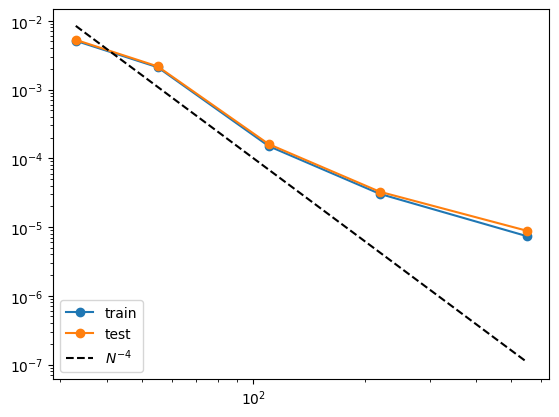

In [22]:
import numpy as np
import matplotlib.pyplot as plt

n_params = np.array(grids) * (4*2+2*1+1*1)
plt.plot(n_params, train_rmse, marker="o")
plt.plot(n_params, test_rmse, marker="o")
plt.plot(n_params, 10000*n_params**(-4.), color="black", ls="--")
plt.legend(['train', 'test', r'$N^{-4}$'], loc="lower left")
plt.xscale('log')
plt.yscale('log')
print(train_rmse)
print(test_rmse)

### Two-layer KAN

Now we show that a 2 two-layer KAN performs much worse for this task

train loss: 6.70e-02 | test loss: 6.96e-02 | reg: 7.16e+00 : 100%|██| 20/20 [00:08<00:00,  2.40it/s]


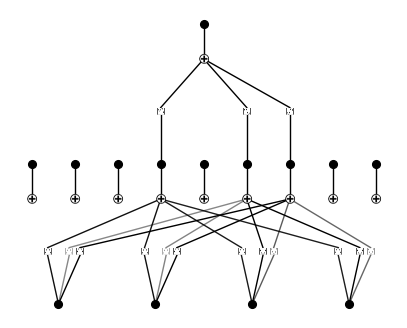

In [23]:
from kan import KAN, create_dataset
import torch

# create a KAN: 2D inputs, 1D output, and 5 hidden neurons. cubic spline (k=3), 5 grid intervals (grid=5).
model = KAN(width=[4,9,1], grid=3, k=3, seed=0)
f = lambda x: torch.exp((torch.sin(torch.pi*(x[:,[0]]**2+x[:,[1]]**2))+torch.sin(torch.pi*(x[:,[2]]**2+x[:,[3]]**2)))/2)
dataset = create_dataset(f, n_var=4, train_num=3000)

# train the model
model.fit(dataset, opt="LBFGS", steps=20, lamb=0.002, lamb_entropy=2.);
model.plot(beta=10)

In [9]:
grids = [3,5,10,20,50]

train_rmse = []
test_rmse = []

for i in range(len(grids)):
    model = KAN(width=[4,9,1], grid=grids[i], k=3, seed=0).initialize_from_another_model(model, dataset['train_input'])
    results = model.fit(dataset, opt="LBFGS", steps=50, stop_grid_update_step=30);
    train_rmse.append(results['train_loss'][-1].item())
    test_rmse.append(results['test_loss'][-1].item())

train loss: 3.30e-02 | test loss: 3.90e-02 | reg: 1.04e+01 : 100%|██| 50/50 [00:20<00:00,  2.49it/s]
train loss: 1.09e-02 | test loss: 1.41e-02 | reg: 9.49e+00 : 100%|██| 50/50 [00:31<00:00,  1.57it/s]
train loss: 3.13e-03 | test loss: 5.64e-03 | reg: 8.91e+00 : 100%|██| 50/50 [00:25<00:00,  1.95it/s]
train loss: 1.13e-02 | test loss: 2.70e-02 | reg: 8.72e+00 : 100%|██| 50/50 [00:28<00:00,  1.78it/s]
train loss: 1.96e-02 | test loss: 5.24e-02 | reg: 9.27e+00 : 100%|██| 50/50 [00:51<00:00,  1.03s/it]


[0.035936225205659866, 0.02279285155236721, 0.00833611935377121, 0.005708411335945129, 0.010341067798435688]
[0.05229281634092331, 0.031011207029223442, 0.010879972018301487, 0.010645035654306412, 0.06304473429918289]


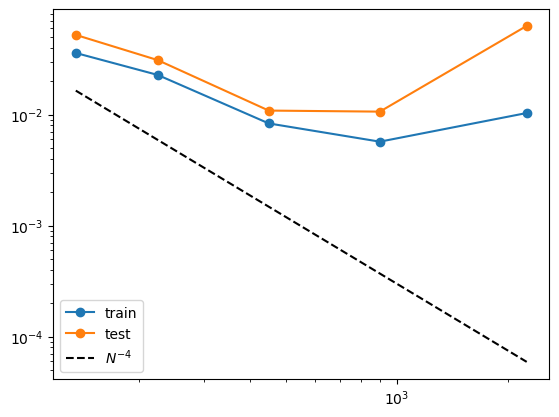

In [9]:
import numpy as np
import matplotlib.pyplot as plt

n_params = np.array(grids) * (4*9+9*1)
plt.plot(n_params, train_rmse, marker="o")
plt.plot(n_params, test_rmse, marker="o")
plt.plot(n_params, 300*n_params**(-2.), color="black", ls="--")
plt.legend(['train', 'test', r'$N^{-4}$'], loc="lower left")
plt.xscale('log')
plt.yscale('log')
print(train_rmse)
print(test_rmse)

In [ ]:

deep_f = lambda x: torch.exp((torch.sin(torch.pi*(x[:,[0]]**2+x[:,[1]]**2))+torch.sin(torch.pi*(x[:,[2]]**2+x[:,[3]]**2)))/2)
dataset = create_dataset(f, n_var=4, train_num=3000)

# train the model
model.fit(dataset, opt="LBFGS", steps=20, lamb=0.002, lamb_entropy=2.);